In [1]:
import cv2
import numpy as np
import moviepy.editor
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [6]:
def load_image(image_path):
    im = cv2.imread(image_path)
    return im

In [74]:
def display_image(arr, title=None):
    plt.imshow(arr)
    plt.axis('off')
    plt.title(title)
    plt.show()

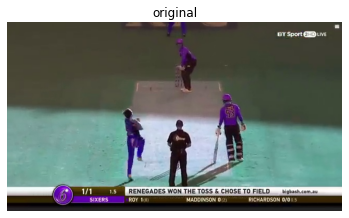

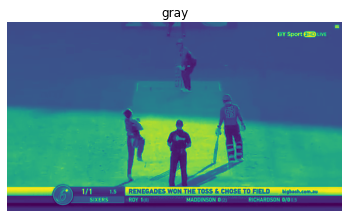

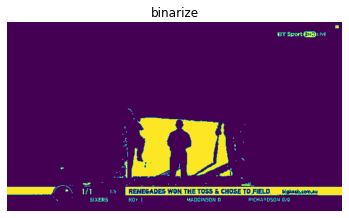

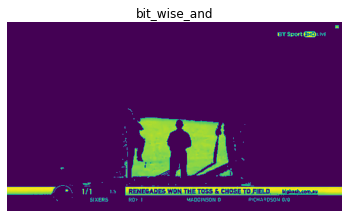

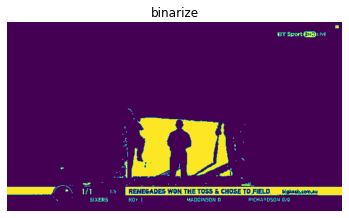

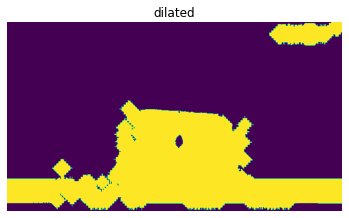

In [91]:
im = load_image('/home/alina/Desktop/DS5500/code/melVSsyd-Scene-0523-02.jpg')
display_image(im, 'original')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
display_image(gray, 'gray')
ret, mask = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
display_image(mask, 'binarize')

img_final = cv2.bitwise_and(gray, gray, mask=mask)
display_image(img_final, 'bit_wise_and')
ret, new_img = cv2.threshold(img_final, 180, 255, cv2.THRESH_BINARY)
display_image(new_img, 'binarize')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
dilated = cv2.dilate(new_img, kernel, iterations=4)
display_image(dilated, 'dilated')

In [9]:
def get_dilated_image(im):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
    img_final = cv2.bitwise_and(gray, gray, mask=mask)
    ret, new_img = cv2.threshold(img_final, 180, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (10,10))
    dilated = cv2.dilate(new_img, kernel, iterations=6)
    return dilated

In [52]:
def get_difference(im1, im2):
    return np.sum(cv2.bitwise_xor(im1, im2))

In [50]:
def match_pitch(im, sample_ball_start):
    d_im = get_dilated_image(im)
    diff = get_difference(d_im, sample_ball_start)
    if diff < 10000000:
        return True

In [2]:
clip = moviepy.editor.VideoFileClip('videos/perthVSmel.mp4')
clip.fps = 1
x = 1
for frame in tqdm(clip.iter_frames(), total=clip.fps*clip.duration):
#     if match_pitch(frame, sample):
    plt.imsave(f"perthVSmel_frames/perthVSmel_{x}.png", frame)
    x+=1

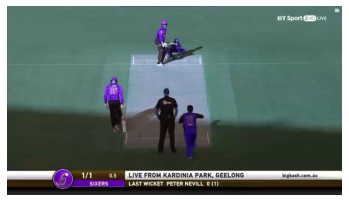

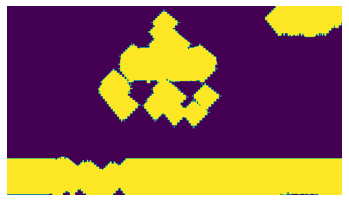

In [36]:
sample = load_image('melVSsyd-Scene-0421-01.jpg')
display_image(sample)
display_image(get_dilated_image(sample))

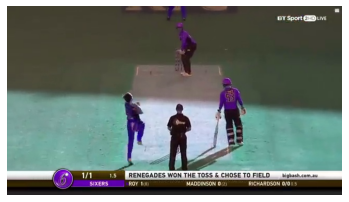

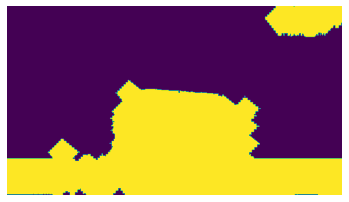

In [40]:
sample = load_image('melVSsyd-Scene-0523-02.jpg')
display_image(sample)
display_image(get_dilated_image(sample))

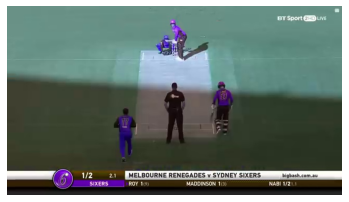

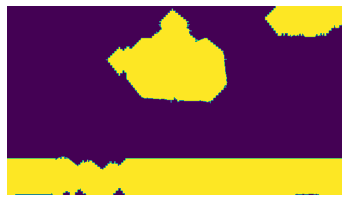

In [41]:
sample = load_image('melVSsyd-Scene-0581-01.jpg')
display_image(sample)
display_image(get_dilated_image(sample))

In [3]:
from keras.models import load_model
model = load_model('../cricket-project/startofballimproved.h5')

In [5]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 158, 126, 32)      896       
                                                                 
 activation_21 (Activation)  (None, 158, 126, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 79, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 77, 61, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 77, 61, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 38, 30, 32)       0         
 g2D)                                                 

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
def load_prediction_image(img_path, show=False):
    im = cv2.imread(img_path)[:498, :720]
    im = cv2.resize(im, (128, 160))
    img_tensor = image.array_to_img(im)
    img_tensor = image.img_to_array(img_tensor)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    if show:
        plt.imshow(im)                           
        plt.axis('off')
        plt.show()
        
    return img_tensor

In [4]:
import glob,shutil
from tqdm import tqdm_notebook as tqdm
imgs = sorted(glob.glob("perthVSmel_frames/*.png"))

In [8]:

for img_path in tqdm(imgs):
    img_tensor = load_prediction_image(img_path)
    score = model.predict(img_tensor)
    if score > 0.9:
        shutil.move(img_path, './start_perthVSmel/start_{}'.format(img_path.split('/')[-1]))
    else:
        shutil.move(img_path, './perthVSmel_frames/non_start_{}'.format(img_path.split('/')[-1]))

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step



In [ ]:
!scenedetect -i test.mp4 -o output save-images detect-content -t 10

In [106]:
!pip3 install tensorflow

     |████████████████████████████████| 578.1 MB 4.3 kB/s  eta 0:00:01     |███████▉                        | 142.1 MB 13.2 MB/s eta 0:00:33    |██████████▎                     | 185.8 MB 4.9 MB/s eta 0:01:20     |████████████▌                   | 226.0 MB 11.9 MB/s eta 0:00:30     |████████████▉                   | 231.6 MB 21.3 MB/s eta 0:00:17��█▉            | 358.6 MB 13.4 MB/s eta 0:00:17     |██████████████████████▎         | 402.9 MB 15.3 MB/s eta 0:00:12     |██████████████████████████▌     | 477.8 MB 3.5 MB/s eta 0:00:29     |██████████████████████████████  | 541.5 MB 16.9 MB/s eta 0:00:03     |██████████████████████████████  | 542.9 MB 16.9 MB/s eta 0:00:03     |██████████████████████████████▏ | 544.8 MB 16.9 MB/s eta 0:00:02�█▎ | 546.4 MB 16.9 MB/s eta 0:00:02
     |████████████████████████████████| 57 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 124 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 16.3 MB/s eta 0:00:01
     |█████

    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [3]:
import h5py
f = h5py.File('../cricket-project/startofballimproved.h5', 'r')

In [7]:
f.attrs

b'tensorflow'

In [3]:
!pip3 install keras=='2.2.3'

In [4]:
import keras

Using TensorFlow backend.
